In [ ]:
#code to get data for Bitcoin, S&P 500, S&P400, Russell 2000 and VIX,  daily data from dates of Jan 2023 to Feb 2024 from yahoo finance and store in individual data frames

import pandas as pd
import yfinance as yf
import numpy as np

# Define the tickers and date range
tickers = ['BTC-USD', '^GSPC', '^MID', '^RUT', '^VIX','^SPGSCI']
start_date = '2023-01-01'
end_date = '2024-02-29'

# Download the data for each ticker
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)

# Create individual data frames for each ticker
bitcoin_df = data['BTC-USD']
sp500_df = data['^GSPC']
sp400_df = data['^MID']
russell2000_df = data['^RUT']
vix_df = data['^VIX']
spgcci_df=data['^SPGSCI']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Install the TA-Lib C library
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
# Navigate back to the root directory
%cd ../
# Remove the tar.gz file and extracted folder to clean up
!rm -R ta-lib ta-lib-0.4.0-src.tar.gz

# Install the TA-Lib Python wrapper
!pip install TA-Lib


In [ ]:
bitcoin_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566


In [ ]:
bitcoin_df.shape

(424, 6)

In [ ]:
# Check for missing values
print(bitcoin_df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# Defining X and finding Target variable

In [ ]:
#Calculating the average price in next 5 days
bitcoin_df['rolling_avg_next_5'] = bitcoin_df['Close'].rolling(window=5).mean().shift(-4)

# Calculating the average return in the next 5 days
bitcoin_df['average_return_next_5_days'] = (bitcoin_df['rolling_avg_next_5'] - bitcoin_df['Close']) / bitcoin_df['Close']

# Calculating moving, exponential averages, volatility in returns for 'N' days and theirs differences to add as features

In [ ]:


# Calculate daily returns for Bitcoin
bitcoin_df['daily_returns'] = bitcoin_df['Close'].pct_change()

# Moving Averages of Returns for 3, 9,12,15 and 30 days
bitcoin_df['MA_returns_3'] = bitcoin_df['daily_returns'].rolling(window=3).mean()
bitcoin_df['MA_returns_9'] = bitcoin_df['daily_returns'].rolling(window=9).mean()
bitcoin_df['MA_returns_12'] = bitcoin_df['daily_returns'].rolling(window=12).mean()
bitcoin_df['MA_returns_15'] = bitcoin_df['daily_returns'].rolling(window=15).mean()
bitcoin_df['MA_returns_30'] = bitcoin_df['daily_returns'].rolling(window=30).mean()

# Exponential Moving Averages of Returns for 3, 9, and 12 days
bitcoin_df['EWMA_returns_3'] = bitcoin_df['daily_returns'].ewm(span=3).mean()
bitcoin_df['EWMA_returns_9'] = bitcoin_df['daily_returns'].ewm(span=9).mean()
bitcoin_df['EWMA_returns_12'] = bitcoin_df['daily_returns'].ewm(span=12).mean()
bitcoin_df['EWMA_returns_15'] = bitcoin_df['daily_returns'].ewm(span=15).mean()
bitcoin_df['EWMA_returns_30'] = bitcoin_df['daily_returns'].ewm(span=30).mean()

# Volatility (Standard Deviation) of Returns for 3, 9, and 12 days
bitcoin_df['Volatility_returns_3'] = bitcoin_df['daily_returns'].rolling(window=3).std()
bitcoin_df['Volatility_returns_9'] = bitcoin_df['daily_returns'].rolling(window=9).std()
bitcoin_df['Volatility_returns_12'] = bitcoin_df['daily_returns'].rolling(window=12).std()
bitcoin_df['Volatility_returns_15'] = bitcoin_df['daily_returns'].rolling(window=15).std()
bitcoin_df['Volatility_returns_30'] = bitcoin_df['daily_returns'].rolling(window=30).std()

# Differences between MAs of Returns
bitcoin_df["MA_diff_9_3"] = bitcoin_df["MA_returns_9"] - bitcoin_df["MA_returns_3"]
bitcoin_df["MA_diff_12_9"] = bitcoin_df["MA_returns_12"] - bitcoin_df["MA_returns_9"]
bitcoin_df["MA_diff_12_3"] = bitcoin_df["MA_returns_12"] - bitcoin_df["MA_returns_3"]
bitcoin_df["MA_diff_15_12"] = bitcoin_df["MA_returns_15"] - bitcoin_df["MA_returns_12"]
bitcoin_df["MA_diff_15_30"] = bitcoin_df["MA_returns_30"] - bitcoin_df["MA_returns_15"]


# Differences between EWMAs of Returns
bitcoin_df["EWMA_diff_9_3"] = bitcoin_df["EWMA_returns_9"] - bitcoin_df["EWMA_returns_3"]
bitcoin_df["EWMA_diff_12_9"] = bitcoin_df["EWMA_returns_12"] - bitcoin_df["EWMA_returns_9"]
bitcoin_df["EWMA_diff_12_3"] = bitcoin_df["EWMA_returns_12"] - bitcoin_df["EWMA_returns_3"]
bitcoin_df["EWMA_diff_15_12"] = bitcoin_df["EWMA_returns_15"] - bitcoin_df["EWMA_returns_12"]
bitcoin_df["EWMA_diff_15_30"] = bitcoin_df["EWMA_returns_30"] - bitcoin_df["EWMA_returns_15"]




In [ ]:
bitcoin_df.head()

,Open,High,Low,Close,Adj Close,Volume,rolling_avg_next_5,average_return_next_5_days,daily_returns,MA_returns_3,...,MA_diff_9_3,MA_diff_12_9,MA_diff_12_3,MA_diff_15_12,MA_diff_15_30,EWMA_diff_9_3,EWMA_diff_12_9,EWMA_diff_12_3,EWMA_diff_15_12,EWMA_diff_15_30
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,16738.676563,0.006833,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,16804.054297,0.006926,0.003813,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,16857.375781,0.010643,-0.000516,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000481,0.000060,0.000541,0.000036,0.000072
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,16939.633203,0.004530,0.010994,0.004764,...,NaN,NaN,NaN,NaN,NaN,-0.001343,-0.000151,-0.001494,-0.000088,-0.000171
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,17006.296484,0.010071,-0.001572,0.002969,...,NaN,NaN,NaN,NaN,NaN,0.000718,0.000056,0.000774,0.000030,0.000053


In [ ]:
bitcoin_df['volatility']= bitcoin_df['daily_returns'].rolling(window=5).std()*np.sqrt(424)

# Fixing the threshold for target variable

In [ ]:
# Define X as 80th percentile or 90th percentile
X = bitcoin_df['average_return_next_5_days'].quantile(0.8)
if X < 0.02:
    X = bitcoin_df['average_return_next_5_days'].quantile(0.9)

In [ ]:
X

0.02341329717702149

In [ ]:
import talib

# Calculating some technical indicators to add as features

In [ ]:
#These indicators focus on giving us information about Volatility, Volume and Momentum/Trend in the graph.

# RSI for Bitcoin
bitcoin_df['RSI'] = talib.RSI(bitcoin_df['Close'], timeperiod=7)

# MACD for Bitcoin
bitcoin_df['MACD'], bitcoin_df['MACD_signal'], bitcoin_df['MACD_hist'] = talib.MACD(
    bitcoin_df['Close'], fastperiod=5, slowperiod=10, signalperiod=5)

# Bollinger Bands for Bitcoin
bitcoin_df['BB_upper'], bitcoin_df['BB_middle'], bitcoin_df['BB_lower'] = talib.BBANDS(
    bitcoin_df['Close'], timeperiod=10, nbdevup=2, nbdevdn=2, matype=0)

# Average True Range (ATR) for Bitcoin
bitcoin_df['ATR'] = talib.ATR(bitcoin_df['High'], bitcoin_df['Low'], bitcoin_df['Close'], timeperiod=7)

# Stochastic Oscillator for Bitcoin
bitcoin_df['stoch_k'], bitcoin_df['stoch_d'] = talib.STOCH(
    bitcoin_df['High'], bitcoin_df['Low'], bitcoin_df['Close'],
    fastk_period=7, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

# On-Balance Volume (OBV) for Bitcoin
bitcoin_df['OBV'] = talib.OBV(bitcoin_df['Close'], bitcoin_df['Volume'])

# Parabolic SAR for Bitcoin
bitcoin_df['SAR'] = talib.SAR(bitcoin_df['High'], bitcoin_df['Low'], acceleration=0.02, maximum=0.2)

# Commodity Channel Index (CCI) for Bitcoin
bitcoin_df['CCI'] = talib.CCI(bitcoin_df['High'], bitcoin_df['Low'], bitcoin_df['Close'], timeperiod=7)

# Accumulation/Distribution Line (ADL) for Bitcoin
bitcoin_df['ADL'] = talib.AD(bitcoin_df['High'], bitcoin_df['Low'], bitcoin_df['Close'], bitcoin_df['Volume'])

# Momentum Indicator (MOM) for Bitcoin
bitcoin_df['MOM'] = talib.MOM(bitcoin_df['Close'], timeperiod=5)







In [ ]:
bitcoin_df

In [ ]:
# prompt: calculate null values in each column

# Check for missing values in each column
missing_values = bitcoin_df.isnull().sum()
print(missing_values)


# Plotting the time series of the average returns on Bitcoin

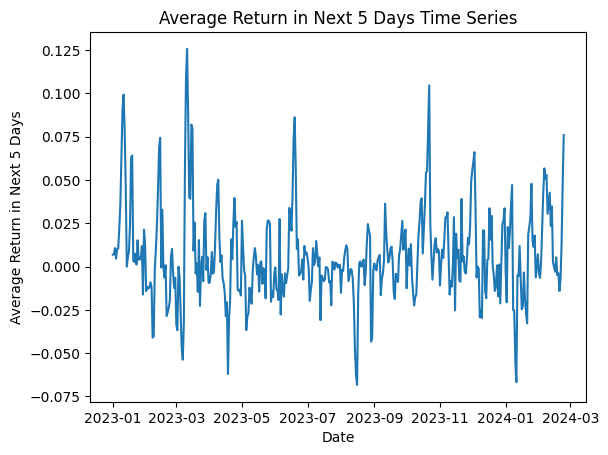

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline
plt.plot(bitcoin_df.index, bitcoin_df['average_return_next_5_days'])
plt.xlabel('Date')
plt.ylabel('Average Return in Next 5 Days')
plt.title('Average Return in Next 5 Days Time Series')
plt.show()

In [ ]:
# Define target variable
bitcoin_df['target'] = (bitcoin_df['average_return_next_5_days'] >= X).shift(-5).dropna()

In [ ]:
bitcoin_df.head(10)

In [ ]:

bitcoin_df = bitcoin_df.dropna(subset=['target'])

# Now, bitcoin_df does not contain rows where 'target' is NaN.


In [ ]:
bitcoin_df['target']=bitcoin_df['target'].astype(int) #converting Target variable to zeroes and ones from boolean values.

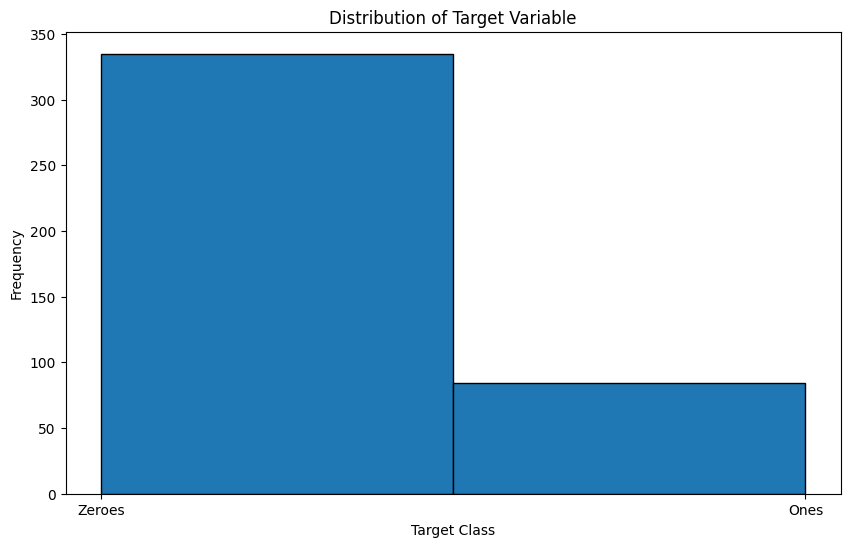

In [ ]:
# a plot of bitcoin_df['target'] where you can show class imbalance in them

import matplotlib.pyplot as plt
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
plt.hist(bitcoin_df['target'], bins=2, edgecolor='black')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Zeroes', 'Ones'])
plt.show()


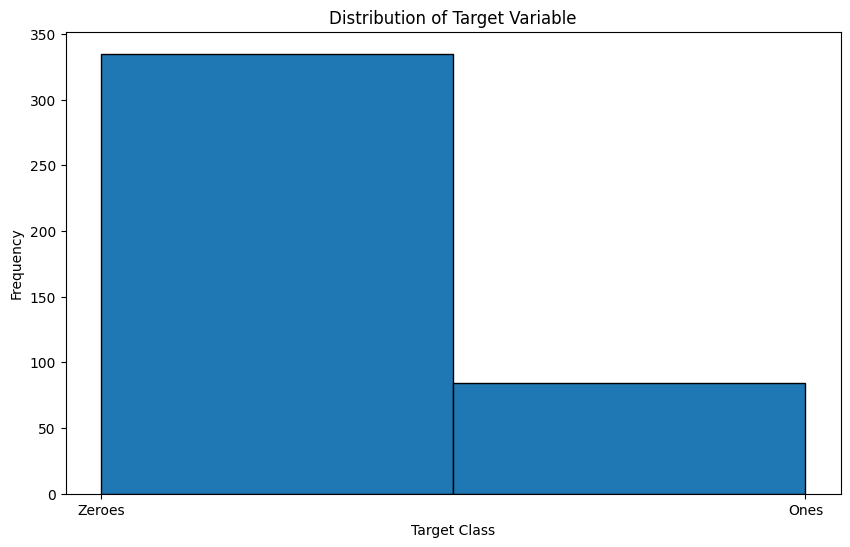

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6), facecolor='none')
plt.hist(bitcoin_df['target'], bins=2, edgecolor='black')
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Zeroes', 'Ones'])
plt.show()

In [ ]:
bitcoin_df.shape

(419, 51)

# Simply checking and plotting for correlation among variables and their correlation with target variable.

In [ ]:
#checking for correlation
correlation_with_target = bitcoin_df.corrwith(bitcoin_df['target']).sort_values()

# Display the correlation values
print(correlation_with_target)

In [ ]:
#checking for multi-collinearity
# Calculate correlation matrix for features
correlation_matrix = bitcoin_df.drop('target', axis=1).corr()

#Display the correlation matrix
print(correlation_matrix)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


# Data splitting

In [ ]:
# Define split dates
split_date1 = '2023-10-17'  # First split date
split_date2 = '2023-12-22'  # Second split date

# Split the data into train, and tests sets
Train = bitcoin_df[bitcoin_df.index < split_date1]
Test1 = bitcoin_df[(bitcoin_df.index >= split_date1) & (bitcoin_df.index < split_date2)]
Test2 = bitcoin_df[bitcoin_df.index >= split_date2]


In [ ]:
Y_train = Train.target
X_train = Train.drop(["target"], axis = 1)

Y_test_1 = Test1.target
X_test_1 = Test1.drop(["target"], axis = 1)

Y_test_2 = Test2.target
X_test_2 = Test2.drop(["target"], axis = 1)

In [ ]:
Y_train.shape[0]

289

In [ ]:
X_test_1.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'rolling_avg_next_5', 'average_return_next_5_days', 'daily_returns',
       'MA_returns_3', 'MA_returns_9', 'MA_returns_12', 'MA_returns_15',
       'MA_returns_30', 'EWMA_returns_3', 'EWMA_returns_9', 'EWMA_returns_12',
       'EWMA_returns_15', 'EWMA_returns_30', 'Volatility_returns_3',
       'Volatility_returns_9', 'Volatility_returns_12',
       'Volatility_returns_15', 'Volatility_returns_30', 'MA_diff_9_3',
       'MA_diff_12_9', 'MA_diff_12_3', 'MA_diff_15_12', 'MA_diff_15_30',
       'EWMA_diff_9_3', 'EWMA_diff_12_9', 'EWMA_diff_12_3', 'EWMA_diff_15_12',
       'EWMA_diff_15_30', 'volatility', 'RSI', 'MACD', 'MACD_signal',
       'MACD_hist', 'BB_upper', 'BB_middle', 'BB_lower', 'ATR', 'stoch_k',
       'stoch_d', 'OBV', 'SAR', 'CCI', 'ADL', 'MOM'],
      dtype='object')

In [ ]:
print (X_train.shape)
print (X_test_1.shape[0])
print (X_test_2.shape[0])

(289, 50)
66
64


# We will use SHAP analysis instead of feature imporatnce to get the most relevant features.



In [ ]:
import xgboost as xgb
xgb_instance = xgb.XGBClassifier(n_estimators = 20)
model_feature_importance = xgb_instance.fit(X_train, Y_train)

In [ ]:
#feature_importance = {'Feature':X_train.columns,'Importance':model_feature_importance.feature_importances_}
#feature_importance = pd.DataFrame(feature_importance)
#feature_importance.sort_values("Importance", inplace=True,ascending=False)
#print (feature_importance.to_string())

In [ ]:
#final_features = feature_importance["Feature"][feature_importance.Importance > 0.01]

In [ ]:
# prompt: install shap

!pip install shap


In [ ]:
# code that will show SHAP analysis

import shap
explainer = shap.TreeExplainer(xgb_instance)
shap_values = explainer.shap_values(X_train)
shap_summary = pd.DataFrame(shap_values, columns=X_train.columns)

# Calculate the mean absolute value of the SHAP values for each feature
shap_importance = shap_summary.apply(np.abs).mean().sort_values(ascending=False)

# Print the feature importance
print(shap_importance)


OBV                           0.604183
MA_returns_15                 0.404385
rolling_avg_next_5            0.350251
MA_returns_30                 0.262139
MA_diff_15_30                 0.249528
MACD_hist                     0.223509
EWMA_diff_9_3                 0.206384
SAR                           0.205573
Volume                        0.168846
average_return_next_5_days    0.149769
MA_diff_12_3                  0.145728
BB_middle                     0.142937
MA_diff_9_3                   0.141076
Volatility_returns_15         0.137978
ATR                           0.128904
Volatility_returns_9          0.126036
MA_returns_3                  0.112856
daily_returns                 0.105642
Volatility_returns_3          0.098000
EWMA_diff_15_12               0.085559
stoch_d                       0.084193
BB_upper                      0.083304
Volatility_returns_30         0.082134
MA_diff_15_12                 0.081180
EWMA_returns_9                0.079972
MOM                      

In [ ]:
# Select the top N features
N = 20  # For example, select the top 20 features
top_features = shap_importance.head(N).index.tolist()


# Subset your training and test sets to include only the top features
X_train_selected = X_train[top_features]
X_test_1_selected = X_test_1[top_features]
X_test_2_selected = X_test_2[top_features]


In [ ]:
#X_train = X_train[final_features]
#X_test_1 = X_test_1[final_features]
#X_test_2 = X_test_2[final_features]

In [ ]:
print (X_train_selected.shape)
print (X_test_1_selected.shape)
print (X_test_2_selected.shape)

(289, 20)
(66, 20)
(64, 20)


In [ ]:
#bitcoin_df_plotDF= bitcoin_df[top_features]

In [ ]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
#for col in bitcoin_df_plotDF.columns:
    #if col != 'Date' and col != 'average_return_next_5_days':
       # plt.figure(figsize=(10, 4))
       # plot_acf(bitcoin_df_plotDF[col], lags=30)
       # plt.title(f'Autocorrelation Function (ACF) for {col}')
       # plt.xlabel('Lag')
        #plt.ylabel('Autocorrelation')
       # plt.show()

        #plt.figure(figsize=(10, 4))
        #plot_pacf(bitcoin_df_plotDF[col], lags=30)
        #plt.title(f'Partial Autocorrelation Function (PACF) for {col}')
        #plt.xlabel('Lag')
        #plt.ylabel('Partial Autocorrelation')
        #plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
import pandas as pd
import xgboost as xgb

# Initialize a DataFrame to store the results
table = pd.DataFrame(columns=["Num Trees", "Learning Rate","max_depth", "Reg Alpha", "Reg Lambda","Weight","AUC Train", "AUC Test1", "AUC Test2"])

row = 0
for num_trees in [20,50,100]:
    for lr in [0.001, 0.01, 0.1]:
       for max_depth in [3, 4]:
        for reg_alpha in [0, 0.1, 1, 5]:
          for reg_lambda in [0, 0.1, 1, 5]:
              for weight in [1, 5, 10]:
                # Initialize XGBoost classifier with specified parameters
                xgb_instance = xgb.XGBClassifier(n_estimators=num_trees,
                                                 learning_rate=lr,
                                                 max_depth= max_depth,
                                                 reg_alpha=reg_alpha,  # L1 regularization
                                                 reg_lambda=reg_lambda,  # L2 regularization
                                                 scale_pos_weight=weight)
                # Fit the model on training data
                model = xgb_instance.fit(X_train_selected, Y_train)

                # Calculate AUC scores for training and testing sets
                auc_train = roc_auc_score(Y_train, model.predict_proba(X_train_selected)[:, 1])
                auc_test1 = roc_auc_score(Y_test_1, model.predict_proba(X_test_1_selected)[:, 1])
                auc_test2 = roc_auc_score(Y_test_2, model.predict_proba(X_test_2_selected)[:, 1])

                # Store the results in the DataFrame
                table.loc[row, "Num Trees"] = num_trees
                table.loc[row, "Learning Rate"] = lr
                table.loc[row, "max_depth"] = max_depth
                table.loc[row, "Reg Alpha"] = reg_alpha
                table.loc[row, "Reg Lambda"] = reg_lambda
                table.loc[row, "Weight"] = weight
                table.loc[row, "AUC Train"] = auc_train
                table.loc[row, "AUC Test1"] = auc_test1
                table.loc[row, "AUC Test2"] = auc_test2

                row += 1

In [ ]:
table

,Num Trees,Learning Rate,max_depth,Reg Alpha,Reg Lambda,Weight,AUC Train,AUC Test1,AUC Test2
0,20,0.001,3,0,0,1,0.877637,0.529533,0.467391
1,20,0.001,3,0,0,5,0.888105,0.5,0.532609
2,20,0.001,3,0,0,10,0.775438,0.535714,0.5
3,20,0.001,3,0,0.1,1,0.87715,0.529533,0.467391
4,20,0.001,3,0,0.1,5,0.888105,0.5,0.445652
...,...,...,...,...,...,...,...,...,...
859,100,0.1,4,5,1,5,0.997809,0.445055,0.352657
860,100,0.1,4,5,1,10,0.998539,0.418956,0.332126
861,100,0.1,4,5,5,1,0.980039,0.503434,0.331522
862,100,0.1,4,5,5,5,0.997566,0.457418,0.350242


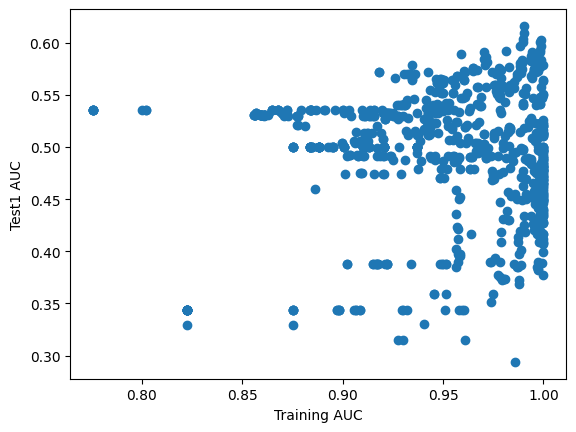

In [ ]:
plt.figure(facecolor='none')
plt.scatter(table["AUC Train"], table["AUC Test1"])
plt.xlabel("Training AUC")
plt.ylabel("Test1 AUC")
plt.show()

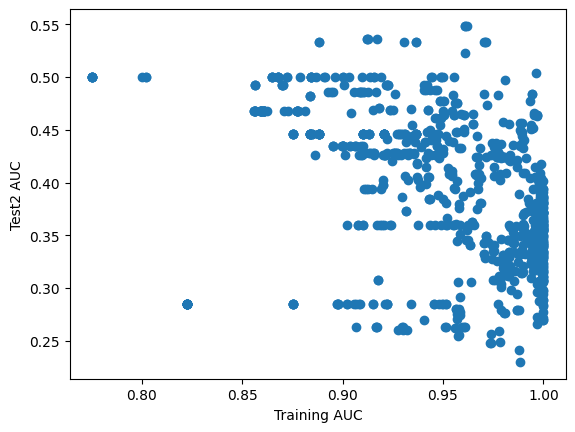

In [ ]:
plt.figure(facecolor='none')
plt.scatter(table["AUC Train"], table["AUC Test2"])
plt.xlabel("Training AUC")
plt.ylabel("Test2 AUC")
plt.show()

# Now creating the Dataframe combined of all the assets.

In [ ]:
final_assets_df= bitcoin_df[top_features]

In [ ]:
#  create a target column in final_bitcoin_df and copy the values from bitcoin_df 's target column into it

final_assets_df['target'] = bitcoin_df['target'].copy()


# Notice that data for other assts is less compared to bitcoin based on the Dataframe shape.

In [ ]:
print(sp500_df.shape)
print(sp400_df.shape)
print(russell2000_df.shape)
print(vix_df.shape)
print(spgcci_df.shape)

(290, 6)
(290, 6)
(290, 6)
(290, 6)
(290, 6)


# Now making a function that will calculate features for all the other assets.

In [ ]:
from scipy.stats import linregress
def calculate_features(df):
    # Basic calculations
    df['daily_returns'] = df['Close'].pct_change()

    # Moving Averages, Exponential Moving Averages, and Volatility
    for window in [3, 9, 12, 15, 30]:
        df[f'MA_returns_{window}'] = df['daily_returns'].rolling(window=window).mean()
        df[f'Volatility_returns_{window}'] = df['daily_returns'].rolling(window=window).std()
        df[f'EWMA_returns_{window}'] = df['daily_returns'].ewm(span=window).mean()

    # Differences in MAs and EWMAs
    for window1, window2 in [(9, 3), (12, 9), (12, 3), (15, 12), (15, 30)]:
        df[f"MA_diff_{window1}_{window2}"] = df[f"MA_returns_{window1}"] - df[f"MA_returns_{window2}"]
        df[f"EWMA_diff_{window1}_{window2}"] = df[f"EWMA_returns_{window1}"] - df[f"EWMA_returns_{window2}"]

    # Trend Features
    df['trend_15_days'] = df['daily_returns'].rolling(window=15).apply(lambda x: linregress(np.arange(len(x)), x).slope, raw=False)

    # Technical Indicators
    df['RSI'] = talib.RSI(df['Close'], timeperiod=7)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=5, slowperiod=10, signalperiod=5)
    df['BB_upper'], df['BB_middle'], df['BB_lower'] = talib.BBANDS(df['Close'], timeperiod=10, nbdevup=2, nbdevdn=2, matype=0)
    df['ATR'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=7)
    df['stoch_k'], df['stoch_d'] = talib.STOCH(df['High'], df['Low'], df['Close'], fastk_period=7, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    df['OBV'] = talib.OBV(df['Close'], df['Volume'])
    df['SAR'] = talib.SAR(df['High'], df['Low'], acceleration=0.02, maximum=0.2)
    df['CCI'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=7)
    df['ADL'] = talib.AD(df['High'], df['Low'], df['Close'], df['Volume'])
    df['MOM'] = talib.MOM(df['Close'], timeperiod=5)


    return df





# Using the created function to calculate the new features for all the assets

In [ ]:
sp500_df_features= calculate_features(sp500_df)
sp400_df_features= calculate_features(sp400_df)
russell2000_df_features= calculate_features(russell2000_df)
vix_df_features= calculate_features(vix_df)
spgcci_df_features= calculate_features(spgcci_df)

In [ ]:
sp500_df_features.head()

,Open,High,Low,Close,Adj Close,Volume,daily_returns,MA_returns_3,Volatility_returns_3,EWMA_returns_3,...,BB_middle,BB_lower,ATR,stoch_k,stoch_d,OBV,SAR,CCI,ADL,MOM
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.959140e+09,NaN,NaN,-1.153449e+09,NaN
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000,0.007539,NaN,NaN,0.007539,...,NaN,NaN,NaN,NaN,NaN,8.373220e+09,3794.330078,NaN,1.548571e+08,NaN
2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,3893450000,-0.011646,NaN,NaN,-0.005251,...,NaN,NaN,NaN,NaN,NaN,4.479770e+09,3795.906675,NaN,-2.553414e+09,NaN
2023-01-06,3823.370117,3906.189941,3809.560059,3895.080078,3895.080078,3923560000,0.022841,0.006245,0.01728,0.010802,...,NaN,NaN,NaN,NaN,NaN,8.403330e+09,3797.451740,NaN,4.679362e+08,NaN
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000,-0.000768,0.003476,0.01763,0.004631,...,NaN,NaN,NaN,NaN,NaN,4.091560e+09,3801.801268,NaN,-3.604387e+09,NaN


## Renaming all of the columns in each Dataframe to make columns specific before merging into the bitcoin dataset.


In [ ]:

words_toAdd = ['sp500_df', 'sp400_df','russell2000','vix_df','spgcci_df']

# Loop through each DataFrame along with the words to add
for i, (df, word) in enumerate(zip([sp500_df_features,sp400_df_features,russell2000_df_features,vix_df_features,spgcci_df_features], words_toAdd)):
    # Loop through each column and modify column name
    for column in df.columns:
        df.rename(columns={column: word + '_' + column}, inplace=True)

    # Print the modified DataFrame
    #print(f"DataFrame {i+1} with prefix '{word}':\n{df}\n")




# To merge, will perform an inner join, which will join based on the index(dates).

In [ ]:
final_assets_df= final_assets_df.join(sp500_df_features, how='inner')

In [ ]:
final_assets_df= final_assets_df.join(sp400_df_features, how='inner')
final_assets_df= final_assets_df.join(russell2000_df_features, how='inner')
final_assets_df= final_assets_df.join(vix_df_features, how='inner')
final_assets_df= final_assets_df.join(spgcci_df_features, how='inner')


In [ ]:
final_assets_df.shape

(287, 261)

# Now let's do the Train- Test spilt


In [ ]:
split_date1 = '2023-10-15'  # First split date
split_date2 = '2023-12-20'  # Second split date

# Split the data into train, and tests sets
All_Train = final_assets_df[final_assets_df.index < split_date1]
All_Test1 = final_assets_df[(final_assets_df.index >= split_date1) & (final_assets_df.index < split_date2)]
All_Test2 = final_assets_df[final_assets_df.index >= split_date2]


In [ ]:
All_Y_train = All_Train.target
All_X_train = All_Train.drop(["target"], axis = 1)

All_Y_test_1 = All_Test1.target
All_X_test_1 = All_Test1.drop(["target"], axis = 1)

All_Y_test_2 = All_Test2.target
All_X_test_2 = All_Test2.drop(["target"], axis = 1)

In [ ]:
print (All_X_train.shape[0])
print (All_X_test_1.shape[0])
print (All_X_test_2.shape[0])

197
46
44


# Now implementing XGBoost model for feature importance through SHAP analysis


In [ ]:
import xgboost as xgb
xgb_instance = xgb.XGBClassifier(n_estimators = 20)
model_feature_importance = xgb_instance.fit(All_X_train, All_Y_train)

#feature_importance = {'Feature':All_X_train.columns,'Importance':model_feature_importance.feature_importances_}
#feature_importance = pd.DataFrame(feature_importance)
#feature_importance.sort_values("Importance", inplace=True,ascending=False)
#print (feature_importance.to_string())

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb_instance)
shap_values = explainer.shap_values(All_X_train)
shap_summary = pd.DataFrame(shap_values, columns=All_X_train.columns)

# Calculate the mean absolute value of the SHAP values for each feature
shap_importance = shap_summary.apply(np.abs).mean().sort_values(ascending=False)

# Print the feature importance
print(shap_importance)

MA_returns_15                   0.379687
vix_df_Volatility_returns_30    0.343665
spgcci_df_stoch_k               0.311958
spgcci_df_MA_diff_9_3           0.230751
vix_df_stoch_d                  0.203569
                                  ...   
sp400_df_OBV                    0.000000
sp400_df_SAR                    0.000000
sp400_df_ADL                    0.000000
russell2000_Open                0.000000
spgcci_df_MOM                   0.000000
Length: 260, dtype: float32


In [ ]:
#all_final_features = feature_importance["Feature"][feature_importance.Importance > 0.01]

In [ ]:
#keeping features that contribute to a certain percentage of the total importance. For example, keep features that, cumulatively, account for 95% of the total SHAP importance
cumulative_importance = shap_importance.cumsum() / shap_importance.sum()
threshold = 0.85
selected_features = cumulative_importance[cumulative_importance < threshold].index.tolist()


In [ ]:
top_non_bitcoin_features = [feature for feature in selected_features if feature not in top_features]#[:N] #Selecting only the features from the other assets.

In [ ]:
len(selected_features)

51

In [ ]:
print(selected_features)

['MA_returns_15', 'vix_df_Volatility_returns_30', 'spgcci_df_stoch_k', 'spgcci_df_MA_diff_9_3', 'vix_df_stoch_d', 'rolling_avg_next_5', 'sp400_df_MA_diff_9_3', 'MA_returns_3', 'vix_df_MA_diff_15_12', 'russell2000_Volatility_returns_30', 'SAR', 'Volatility_returns_9', 'vix_df_Open', 'russell2000_Volatility_returns_9', 'sp400_df_MA_returns_30', 'average_return_next_5_days', 'vix_df_MA_diff_12_3', 'sp500_df_Open', 'MA_diff_15_30', 'MACD_hist', 'OBV', 'vix_df_MA_returns_3', 'sp500_df_OBV', 'spgcci_df_MA_diff_12_3', 'sp400_df_EWMA_diff_9_3', 'Volatility_returns_3', 'sp400_df_BB_upper', 'BB_middle', 'russell2000_SAR', 'ATR', 'vix_df_Volatility_returns_12', 'russell2000_EWMA_diff_9_3', 'spgcci_df_EWMA_returns_3', 'vix_df_EWMA_diff_15_30', 'vix_df_ATR', 'sp500_df_EWMA_diff_9_3', 'vix_df_MACD_signal', 'spgcci_df_BB_upper', 'spgcci_df_BB_lower', 'sp500_df_SAR', 'sp500_df_MOM', 'russell2000_MA_returns_30', 'spgcci_df_MA_diff_12_9', 'sp400_df_MA_diff_12_9', 'sp500_df_MA_diff_15_12', 'russell2000_M

In [ ]:
all_final_features=top_features+top_non_bitcoin_features #Now combining both the bitcoin features and all the other asset features.

In [ ]:
len(all_final_features)

58

In [ ]:
feat=pd.DataFrame(all_final_features, columns=['Features'])
print(pd.DataFrame(all_final_features, columns=['Features'])) #Printing out all the features.

                             Features
0                                 OBV
1                       MA_returns_15
2                  rolling_avg_next_5
3                       MA_returns_30
4                       MA_diff_15_30
5                           MACD_hist
6                       EWMA_diff_9_3
7                                 SAR
8                              Volume
9          average_return_next_5_days
10                       MA_diff_12_3
11                          BB_middle
12                        MA_diff_9_3
13              Volatility_returns_15
14                                ATR
15               Volatility_returns_9
16                       MA_returns_3
17                      daily_returns
18               Volatility_returns_3
19                    EWMA_diff_15_12
20       vix_df_Volatility_returns_30
21                  spgcci_df_stoch_k
22              spgcci_df_MA_diff_9_3
23                     vix_df_stoch_d
24               sp400_df_MA_diff_9_3
25          

In [ ]:
#print the above to a csv file

feat.to_csv('all_final_features.csv', index=False)


# Now using only the final features and performing a grid search

In [ ]:
All_X_train = All_X_train[all_final_features]
All_X_test_1 = All_X_test_1[all_final_features]
All_X_test_2 = All_X_test_2[all_final_features]

In [ ]:
print (All_X_train.shape)
print (All_X_test_1.shape)
print (All_X_test_2.shape)

(197, 58)
(46, 58)
(44, 58)


In [ ]:
from sklearn.metrics import roc_auc_score
import pandas as pd
import xgboost as xgb

# Initialize a DataFrame to store the results
table = pd.DataFrame(columns=["Num Trees", "Learning Rate","Max_depth", "Reg Alpha", "Reg Lambda","Weight","AUC Train", "AUC Test1", "AUC Test2"])

row = 0
for num_trees in [20,50,100]:
    for lr in [0.001, 0.01, 0.1]:
       for max_depth in [3, 4]:
        for reg_alpha in [0, 0.1, 1, 5]:
          for reg_lambda in [0, 0.1, 1, 5]:
              for weight in [1, 5, 10]:
                # Initialize XGBoost classifier with specified parameters
                xgb_instance = xgb.XGBClassifier(n_estimators=num_trees,
                                                 learning_rate=lr,
                                                 max_depth= max_depth,
                                                 reg_alpha=reg_alpha,  # L1 regularization
                                                 reg_lambda=reg_lambda,  # L2 regularization
                                                 scale_pos_weight=weight)
                # Fit the model on training data
                model = xgb_instance.fit(All_X_train, All_Y_train)

                # Calculate AUC scores for training and testing sets
                auc_train = roc_auc_score(All_Y_train, model.predict_proba(All_X_train)[:, 1])
                auc_test1 = roc_auc_score(All_Y_test_1, model.predict_proba(All_X_test_1)[:, 1])
                auc_test2 = roc_auc_score(All_Y_test_2, model.predict_proba(All_X_test_2)[:, 1])

                # Store the results in the DataFrame
                table.loc[row, "Num Trees"] = num_trees
                table.loc[row, "Learning Rate"] = lr
                table.loc[row, "Max_depth"] = max_depth
                table.loc[row, "Reg Alpha"] = reg_alpha
                table.loc[row, "Reg Lambda"] = reg_lambda
                table.loc[row, "Weight"] = weight
                table.loc[row, "AUC Train"] = auc_train
                table.loc[row, "AUC Test1"] = auc_test1
                table.loc[row, "AUC Test2"] = auc_test2

                row += 1

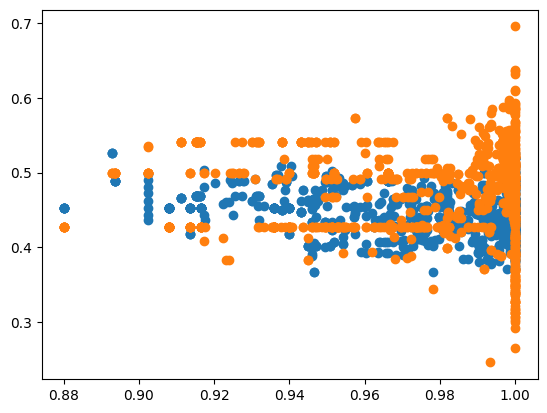

In [ ]:
plt.scatter(table["AUC Train"], table["AUC Test1"])


Text(0, 0.5, 'Test1 AUC')

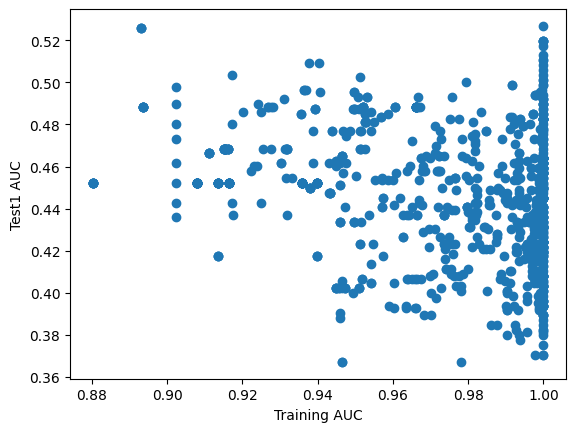

In [ ]:
# prompt: rewrite the above code my labelling the axes

import matplotlib.pyplot as plt
plt.scatter(table["AUC Train"], table["AUC Test1"])
plt.xlabel("Training AUC")
plt.ylabel("Test1 AUC")



Text(0, 0.5, 'Test2 AUC')

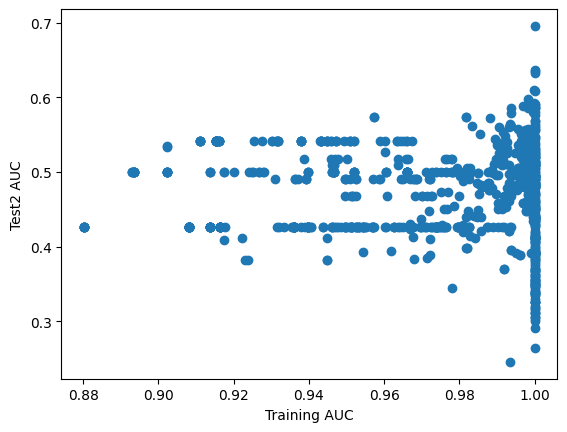

In [ ]:
plt.scatter(table["AUC Train"], table["AUC Test2"])
plt.xlabel("Training AUC")
plt.ylabel("Test2 AUC")

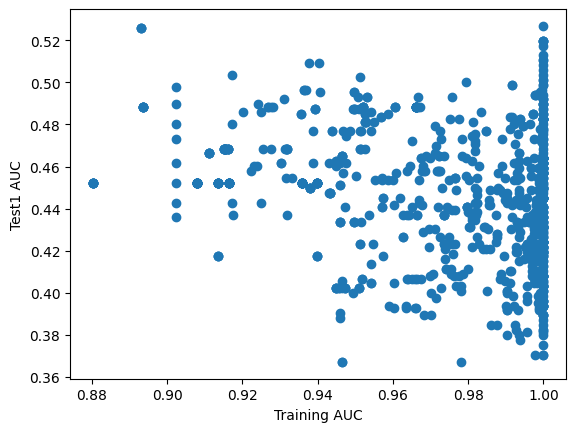

In [ ]:
import matplotlib.pyplot as plt

plt.figure(facecolor='none')
plt.scatter(table["AUC Train"], table["AUC Test1"])
plt.xlabel("Training AUC")
plt.ylabel("Test1 AUC")
plt.show()

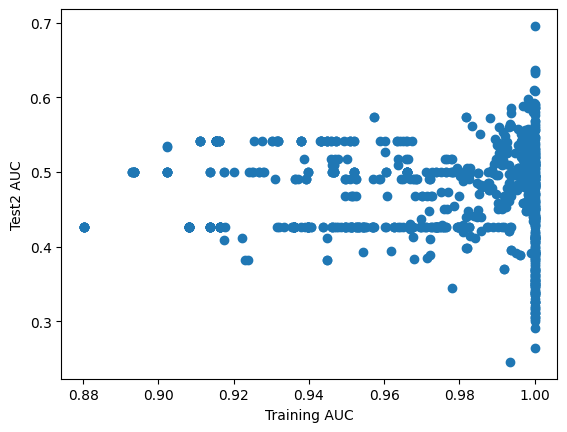

In [ ]:
plt.figure(facecolor='none')
plt.scatter(table["AUC Train"], table["AUC Test2"])
plt.xlabel("Training AUC")
plt.ylabel("Test2 AUC")
plt.show()

In [ ]:
table

,Num Trees,Learning Rate,Max_depth,Reg Alpha,Reg Lambda,Weight,AUC Train,AUC Test1,AUC Test2
0,20,0.001,3,0,0,1,0.931503,0.468531,0.541176
1,20,0.001,3,0,0,5,0.913598,0.417249,0.5
2,20,0.001,3,0,0,10,0.902365,0.461538,0.535294
3,20,0.001,3,0,0.1,1,0.931841,0.468531,0.541176
4,20,0.001,3,0,0.1,5,0.913598,0.452214,0.426471
...,...,...,...,...,...,...,...,...,...
859,100,0.1,4,5,1,5,1.0,0.519814,0.35
860,100,0.1,4,5,1,10,1.0,0.463869,0.326471
861,100,0.1,4,5,5,1,0.993074,0.433566,0.420588
862,100,0.1,4,5,5,5,1.0,0.477855,0.311765
